In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Auto.csv")
     

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [8]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\Auto.csv')

selected_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

# Display basic descriptive statistics
summary_statistics = df[selected_columns].describe()

# Extract specific statistics
mean_value = df[selected_columns].mean()
median_value = df[selected_columns].median()
std_dev_value = df[selected_columns].std()
min_value = df[selected_columns].min()
max_value = df[selected_columns].max()
# Print or display the results
print("Summary Statistics:")
print(summary_statistics)

print("\nMean:")
print(mean_value)

print("\nMedian:")
print(median_value)

print("\nStandard Deviation:")
print(std_dev_value)

print("\nMinimum Values:")
print(min_value)

print("\nMaximum Values:")
print(max_value)

Summary Statistics:
        cylinders  displacement       weight  acceleration        year
count  397.000000    397.000000   397.000000    397.000000  397.000000
mean     5.458438    193.532746  2970.261965     15.555668   75.994962
std      1.701577    104.379583   847.904119      2.749995    3.690005
min      3.000000     68.000000  1613.000000      8.000000   70.000000
25%      4.000000    104.000000  2223.000000     13.800000   73.000000
50%      4.000000    146.000000  2800.000000     15.500000   76.000000
75%      8.000000    262.000000  3609.000000     17.100000   79.000000
max      8.000000    455.000000  5140.000000     24.800000   82.000000

Mean:
cylinders          5.458438
displacement     193.532746
weight          2970.261965
acceleration      15.555668
year              75.994962
dtype: float64

Median:
cylinders          4.0
displacement     146.0
weight          2800.0
acceleration      15.5
year              76.0
dtype: float64

Standard Deviation:
cylinders         1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30360\707606082.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value = df[selected_columns].mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30360\707606082.py:10: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_value = df[selected_columns].median()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30360\707606082.py:11: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying '

In [9]:
df[df['horsepower'].str.isnumeric()==False]  # filters the original DataFrame df to only include rows where the 'horsepower' column is not numeric.
     

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


now we will replace these '6' '?' values by "np.nan"

In [10]:
df=df.replace('?',np.nan)

In [11]:
df=df.drop('name',axis=1)

To fill null values by the median values.

In [12]:
df=df.apply(lambda x: x.fillna(x.median()),axis=0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 24.9+ KB


splitting into dependent(y) and Independent(X)

In [14]:
X=df.drop('mpg',axis=1)

y=df[['mpg']]
     

In [15]:
X

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
392,4,140.0,86,2790,15.6,82,1
393,4,97.0,52,2130,24.6,82,2
394,4,135.0,84,2295,11.6,82,1
395,4,120.0,79,2625,18.6,82,1


In [16]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
392,27.0
393,44.0
394,32.0
395,28.0


Box plots Digram to find outliers.

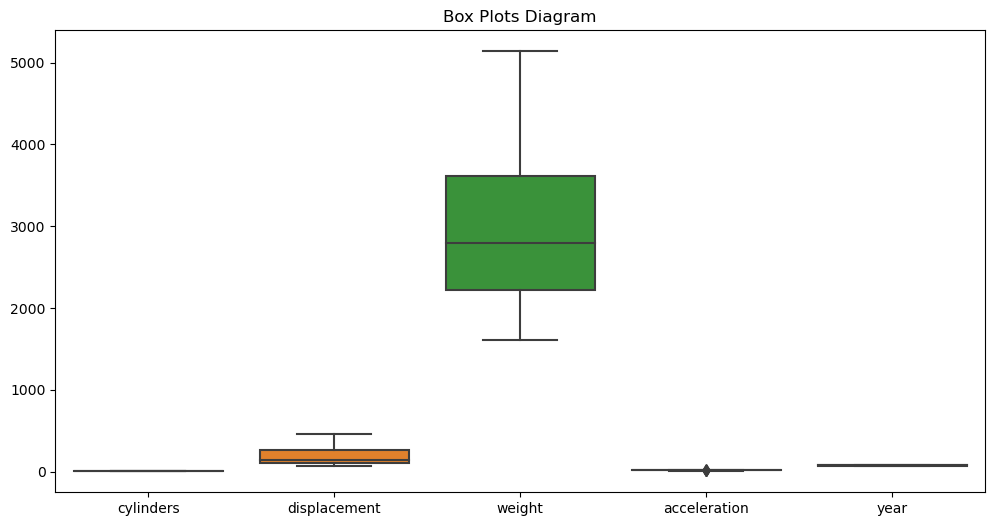

In [17]:
selected_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_columns])
plt.title('Box Plots Diagram')
plt.show()


Distribution plots of independent variables (X)

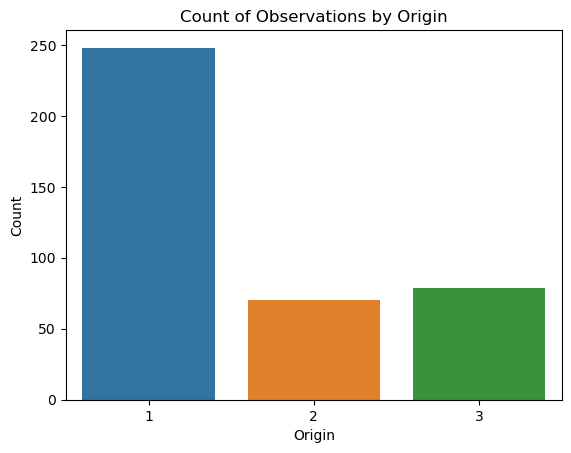

In [18]:
sns.countplot(x='origin', data=df)

plt.title('Count of Observations by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')

plt.show()

Here in the above count plot in "origin"  '1' is repeating more
Dist plot of dependent variable

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30360\415032165.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i], kde=True, bins=5)  # You can adjust the number of bins as needed
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30360\415032165.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

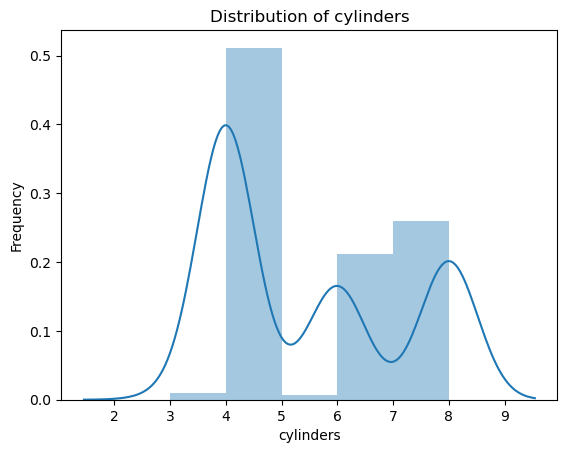

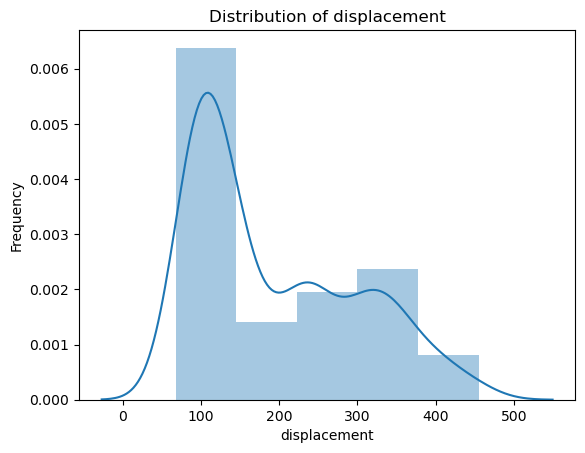

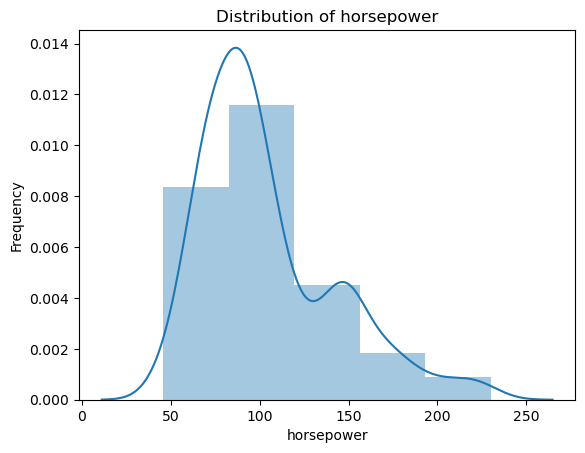

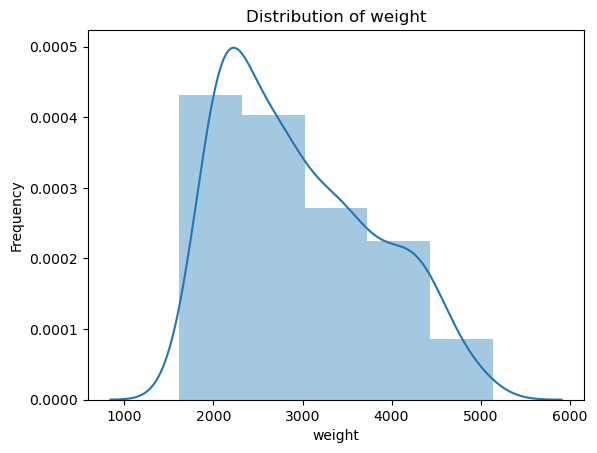

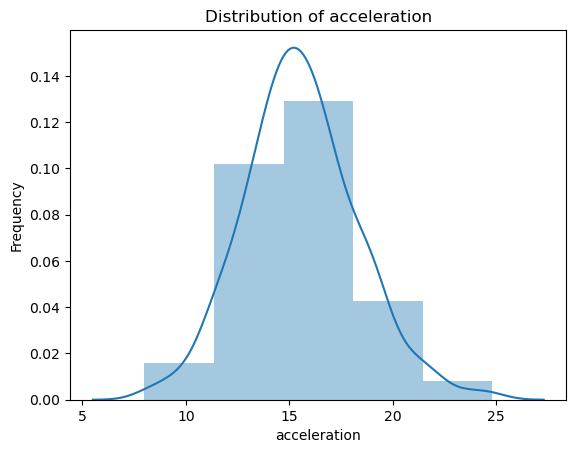

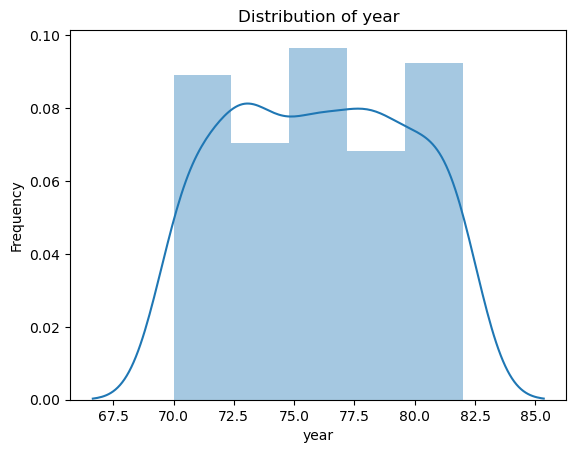

In [19]:
a=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
for i in a:
     plt.figure()
#      sns.distplot(X[i])
     sns.distplot(X[i], kde=True, bins=5)  # You can adjust the number of bins as needed
     plt.title(f'Distribution of {i}')
     plt.xlabel(i)
     plt.ylabel('Frequency')

plt.show()

Displacement , horsepower,weight are right skewed , acceleration is normally distributed,model_year is normal but wider at center,cylinders have certain values that are repeating

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30360\350453685.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y['mpg'], bins=5)  # Adjust the number of bins as needed


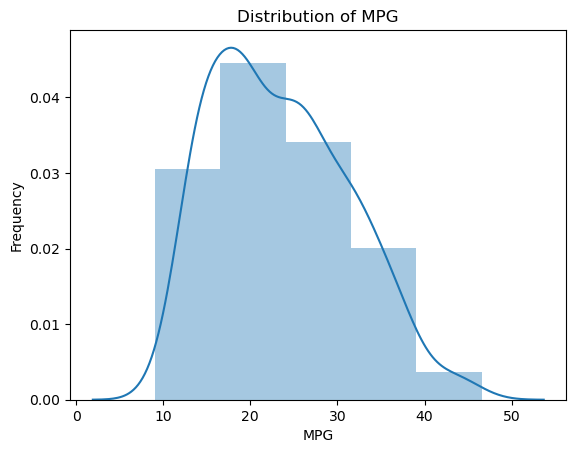

In [20]:
# sns.distplot(y['mpg'])

# Assuming 'y' is your DataFrame and 'mpg' is the column you want to visualize
sns.distplot(y['mpg'], bins=5)  # Adjust the number of bins as needed

plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')

plt.show()



"mpg"  is skewed to right

In [21]:
from sklearn import preprocessing

#scale all the columns of X, this will produce a numpy array

X_scaled=preprocessing.scale(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)  

y_scaled=preprocessing.scale(y)
y_scaled=pd.DataFrame(y_scaled,columns=y.columns)  

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=1)
# test_size=0.2 specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.

# SIMPLLE LINEAR MODEL

In [23]:
# Create a linear regression model
regression_model=LinearRegression()

# Fit the model on the training data
regression_model.fit(X_train,y_train)

# Print the coefficients
for idx,col_name in enumerate(X_train.columns):
  print("the coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

the coefficient for cylinders is -0.05346572695027635
the coefficient for displacement is 0.20729195076640716
the coefficient for horsepower is -0.05657583585629408
the coefficient for weight is -0.7230465733986049
the coefficient for acceleration is 0.04186856220516535
the coefficient for year is 0.37127302629170733
the coefficient for origin is 0.13352093828610273


Here , the coefficient are relatively smaller. So this can be a smoother model.

In [24]:
# Extract and print the intercept
intercept = regression_model.intercept_[0]

# Display the intercept value
print(f"The intercept for the linear regression model is: {intercept}")


The intercept for the linear regression model is: -0.004235510242290495


# Regularized-Ridge Model

In [25]:
# Create a Ridge regression model with a specified alpha value
ridge = Ridge(alpha=0.3)

# Fit the Ridge model on the training data
ridge.fit(X_train, y_train)

# Print the coefficients for each feature
for i, col in enumerate(X_train.columns):
    print("Ridge model coefficient for {} is: {}".format(col, ridge.coef_[0][i]))

Ridge model coefficient for cylinders is: -0.05145158864107052
Ridge model coefficient for displacement is: 0.19794909828991136
Ridge model coefficient for horsepower is: -0.058343978587342346
Ridge model coefficient for weight is: -0.7153267261602922
Ridge model coefficient for acceleration is: 0.04021711167236067
Ridge model coefficient for year is: 0.3703411526013929
Ridge model coefficient for origin is: 0.1329972698349032


We can see low coefficients values compared to linear regression.

# Regularized-Lasso Model

In [26]:
# Create a Lasso regression model with a specified alpha value
lasso = Lasso(alpha=0.1)

# Fit the Lasso model on the training data
lasso.fit(X_train, y_train)

# Print the coefficients for each feature
for i, col in enumerate(X_train.columns):
    print("Lasso model coefficient for {} is: {}".format(col, lasso.coef_[i]))


Lasso model coefficient for cylinders is: -0.0
Lasso model coefficient for displacement is: -0.0
Lasso model coefficient for horsepower is: -0.01877267208672412
Lasso model coefficient for weight is: -0.6012925430185762
Lasso model coefficient for acceleration is: 0.0
Lasso model coefficient for year is: 0.29268303549886276
Lasso model coefficient for origin is: 0.0468210544262706


Many of the coefficients have become 0 so we can drop of those dimensions from the model.It has taken only 5 dimensions to build the model.Lasso is also used for feature selection.

# COMPARING THE SCORE

In [27]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.8147385489135477
0.8477189412837605


In [28]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8147311714805126
0.8475970837924943


Accuracy of linear and ridge are more or less same because both coefficients values are similar

In [29]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7939793570390434
0.8333533288995242


Here the performance of lasso slightly gone down but this model used only 5 dimensions while other two used 8 dimensions. This model is feasible compared to other two because dimensions are reduced

# Polynomial features

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
# Specify the degree for polynomial features
degree = 2

# Create PolynomialFeatures
poly = PolynomialFeatures(degree=degree, interaction_only=True)




In [32]:
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=1)
X_train.shape

(317, 29)

In [33]:
## Simple non regularized linear model on poly features-

In [34]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])
     

[ 1.34453154e-13  9.07777047e-01 -4.45041502e-01 -1.42691204e+00
 -5.06560573e+00 -4.49207952e-02  2.61868640e+00  1.73676328e+00
 -1.00770448e-01  4.79174623e-01  3.05113865e-01  1.63408414e+00
 -9.84470877e-01  2.30723850e-01  9.36744429e-02  2.12296893e+00
 -1.03921063e+00  1.78466480e+00  3.54343307e+00 -7.36765528e-01
 -7.93861937e-01 -1.22440817e-01  5.95883535e-01  4.19683356e-01
 -8.75809541e-01 -1.60076019e+00  6.56666411e-01  1.32846631e+00
  7.07892939e-01]


In [35]:
# since, there are less data points with more dimensions this linear model is o

Regularized-Ridge Model

In [36]:
ridge = Ridge(alpha=.2)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))


Ridge model: [[ 0.          0.88652181 -0.5450213  -1.46884062 -4.98888342 -0.05912591
   2.62167173  1.63441866 -0.14759181  0.35656123  0.45738419  1.53787039
  -0.95993663  0.299424    0.16429294  1.99514736 -0.95976077  1.73583574
   3.20287273 -0.68492914 -0.78567784 -0.13186122  0.54329707  0.41173112
  -0.85042989 -1.43157516  0.65385077  1.30301542  0.69610199]]


We can see coefficients are reduced. It will reduce close to zero but not exactly equal to zero. The 0 value shown up above is rounded up value

In [37]:
print("Ridge model training score:", ridge.score(X_train, y_train))
print("Ridge model testing score:", ridge.score(X_test, y_test))

Ridge model training score: 0.893261847061872
Ridge model testing score: 0.8595002464013525


Regularized-Lasso Model

In [38]:
from sklearn.linear_model import Lasso

# Assuming X_train and y_train are defined in our code
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
print("Lasso model:", lasso.coef_)


Lasso model: [ 0.          0.46241844 -0.20183674 -1.54531794 -4.91433945  0.
  2.63741626  1.45588891 -0.         -0.          0.60144509  0.90423602
 -0.36975773  0.24140683  0.          1.57334383 -0.10634334  0.56746887
  2.53854507 -0.10281123 -0.71357761 -0.11848581  0.          0.15940083
 -0.41346278 -0.67858493  0.59373309  1.20059716  0.53174416]


Lasso making many coeficients to zero. As mentioned above these are not used for model building

In [39]:
print("Lasso model training score:", lasso.score(X_train, y_train))
print("Lasso model testing score:", lasso.score(X_test, y_test))

Lasso model training score: 0.891838235979149
Lasso model testing score: 0.8610879451585302


Lasso is getting 86% accuracy with nearly half the number of dimensions.

Lasso is also used for feature selection and dimensionality reduction technique

 -----------------------------------------THE-END---------------------------------------------------------------------------